In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
np.random.seed(2)
import os
import cv2
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import gzip 
import struct 
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")

In [36]:

def load_images(filename):
    # Open the file
    with gzip.open(filename, 'rb') as f:
        # Read the header information
        magic_number = int.from_bytes(f.read(4), 'big')
        number_of_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        columns = int.from_bytes(f.read(4), 'big')

        # Read the image data
        buffer = f.read()
        images = np.frombuffer(buffer, dtype=np.uint8).reshape(number_of_images, rows, columns)
    return images

def load_labels(filename):
    # Open the file
    with gzip.open(filename, 'rb') as f:
        # Read the header information
        magic_number = int.from_bytes(f.read(4), 'big')
        number_of_labels = int.from_bytes(f.read(4), 'big')

        # Read the label data
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
    return labels

In [39]:
# File paths to the MNIST data
train_images_path = 'Resources/train-images-idx3-ubyte.gz'
train_labels_path = 'Resources/train-labels-idx1-ubyte.gz'
test_images_path = 'Resources/t10k-images-idx3-ubyte.gz'
test_labels_path = 'Resources/t10k-labels-idx1-ubyte.gz'

# Load the data
train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)
X_train, X_cv, y_train, y_cv = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Print the shapes to verify the data
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Training Labels Shape: (60000,)
Test Images Shape: (27561, 28, 28)
Test Labels Shape: (27561,)


In [42]:
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # First Convolutional Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3)),
    # Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2592)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         331,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,018 (1.31 MB)

 Trainable params: 342,890 (1.31 MB)

 Non-trainable params: 128 (512.00 B)

model.fit(X_train,y_train)

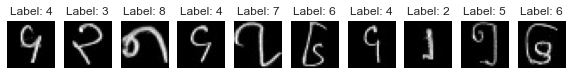

In [45]:
# Assuming X_cv and y_cv are your cross-validation images and labels
# Select a few images to display
num_images_to_show = 10
indices = np.random.choice(len(X_cv), num_images_to_show, replace=False)

plt.figure(figsize=(10, 2))

for i, idx in enumerate(indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28 pixels
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.show()


In [48]:
model.fit(X_train,y_train, validation_data=(X_cv, y_cv), epochs=3, batch_size=50)

Epoch 1/3
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.9586 - loss: 0.1582 - val_accuracy: 0.9927 - val_loss: 0.0311
Epoch 2/3
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9952 - loss: 0.0181 - val_accuracy: 0.9952 - val_loss: 0.0236
Epoch 3/3
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.9975 - loss: 0.0089 - val_accuracy: 0.9953 - val_loss: 0.0252


In [51]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9964 - loss: 0.0241


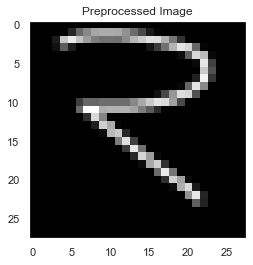

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 1.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


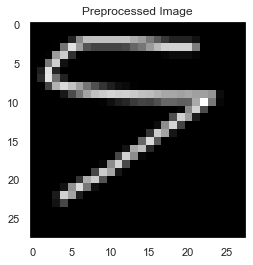

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.9621
Digit 4: 0.0356
Digit 5: 0.0021
Digit 6: 0.0002
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


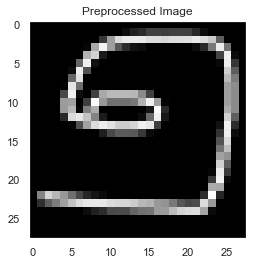

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 1.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


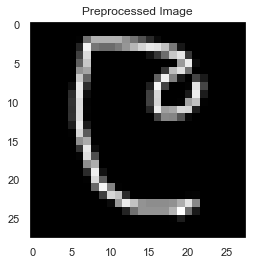

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0061
Digit 4: 0.0000
Digit 5: 0.0002
Digit 6: 0.0001
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.9936


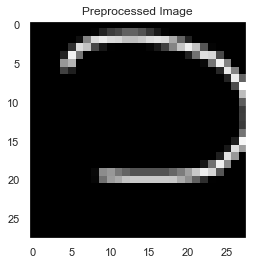

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit 0: 0.0007
Digit 1: 0.9985
Digit 2: 0.0000
Digit 3: 0.0001
Digit 4: 0.0000
Digit 5: 0.0006
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


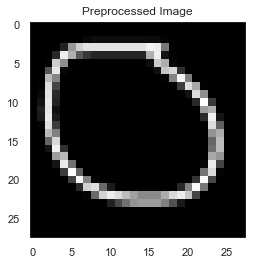

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 1.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


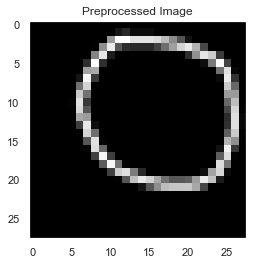

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.9889
Digit 1: 0.0001
Digit 2: 0.0000
Digit 3: 0.0001
Digit 4: 0.0000
Digit 5: 0.0109
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


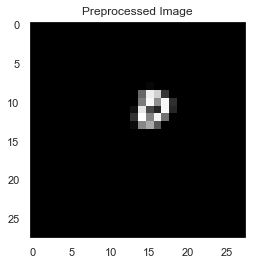

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0001
Digit 1: 0.0026
Digit 2: 0.0020
Digit 3: 0.0905
Digit 4: 0.0009
Digit 5: 0.0001
Digit 6: 0.0000
Digit 7: 0.0001
Digit 8: 0.0006
Digit 9: 0.9031


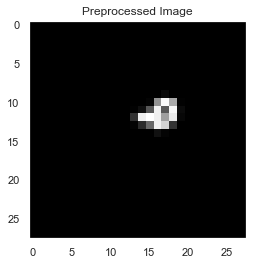

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit 0: 0.0001
Digit 1: 0.0012
Digit 2: 0.0446
Digit 3: 0.6113
Digit 4: 0.0202
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0014
Digit 9: 0.3212


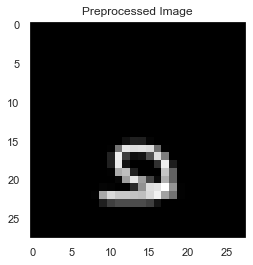

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.1526
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.8473
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


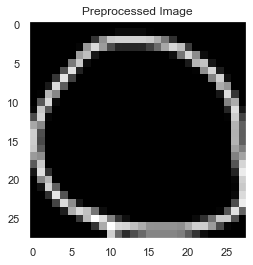

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit 0: 0.9963
Digit 1: 0.0002
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0008
Digit 6: 0.0021
Digit 7: 0.0000
Digit 8: 0.0005
Digit 9: 0.0001


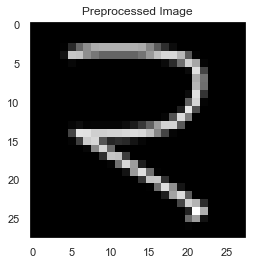

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 1.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


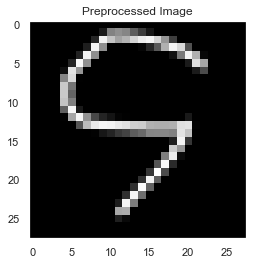

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


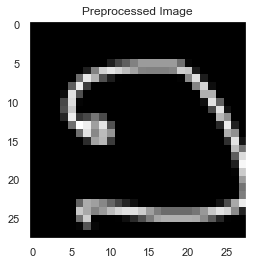

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0979
Digit 2: 0.0001
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.9020
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


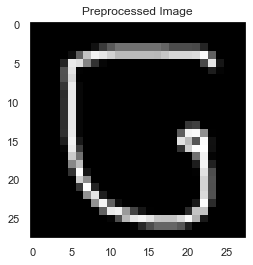

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 1.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


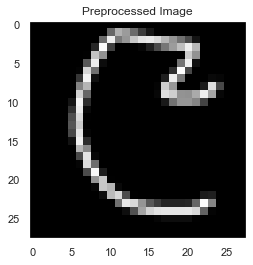

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0001
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0122
Digit 4: 0.0000
Digit 5: 0.0005
Digit 6: 0.8780
Digit 7: 0.0004
Digit 8: 0.0000
Digit 9: 0.1089


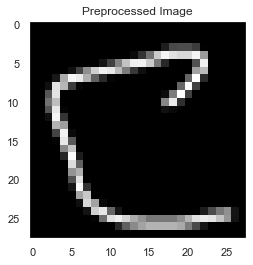

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 1.0000


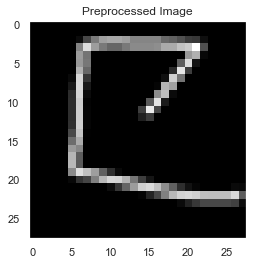

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0013
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0001
Digit 7: 0.0007
Digit 8: 0.0000
Digit 9: 0.9978


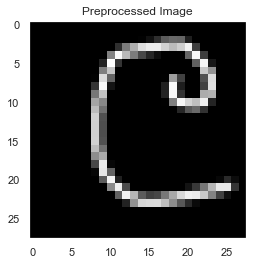

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0001
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0002
Digit 4: 0.0000
Digit 5: 0.9775
Digit 6: 0.0003
Digit 7: 0.0013
Digit 8: 0.0000
Digit 9: 0.0206


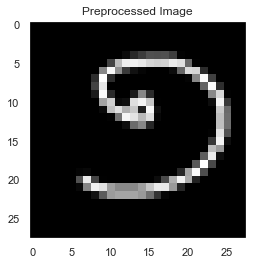

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0098
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.9902
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


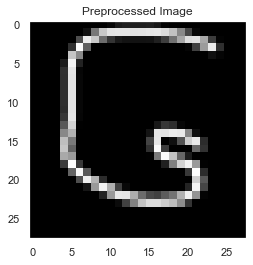

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 1.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


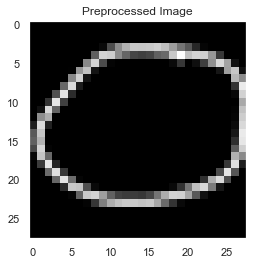

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit 0: 1.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


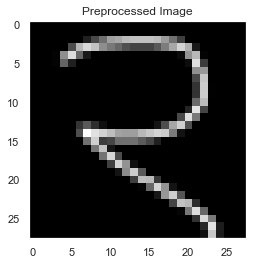

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 1.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


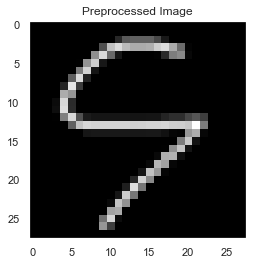

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


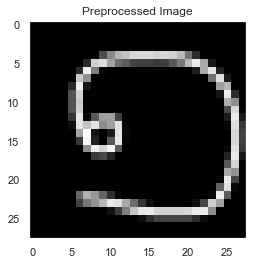

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.9999
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0001
Digit 9: 0.0000


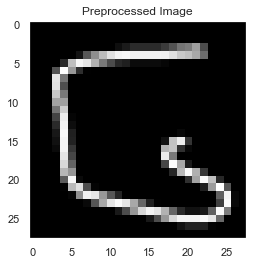

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 1.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


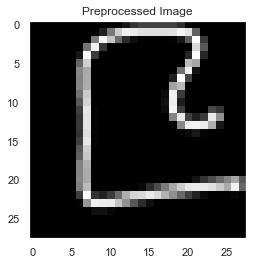

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0002
Digit 4: 0.0001
Digit 5: 0.0189
Digit 6: 0.0001
Digit 7: 0.0689
Digit 8: 0.0000
Digit 9: 0.9117


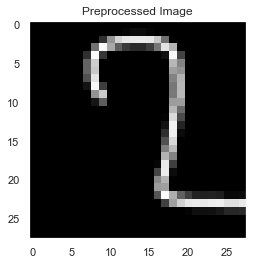

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 1.0000
Digit 8: 0.0000
Digit 9: 0.0000


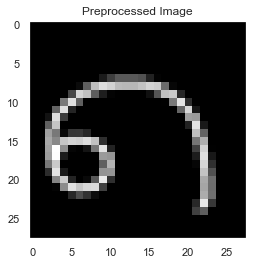

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 1.0000
Digit 9: 0.0000


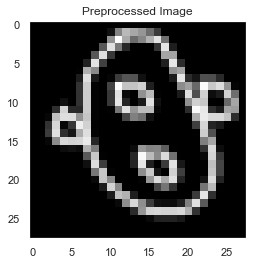

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0002
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.9997
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


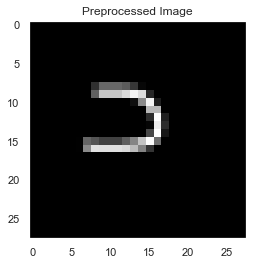

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit 0: 0.0000
Digit 1: 0.0013
Digit 2: 0.0006
Digit 3: 0.8175
Digit 4: 0.1743
Digit 5: 0.0007
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0046
Digit 9: 0.0009


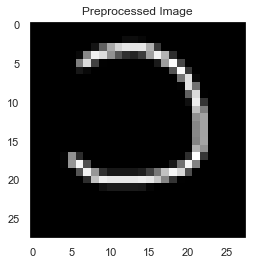

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0001
Digit 1: 0.8233
Digit 2: 0.0000
Digit 3: 0.1764
Digit 4: 0.0000
Digit 5: 0.0002
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


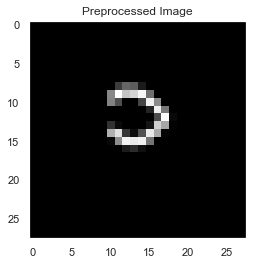

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0000
Digit 1: 0.0006
Digit 2: 0.0003
Digit 3: 0.9204
Digit 4: 0.0666
Digit 5: 0.0007
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0012
Digit 9: 0.0102


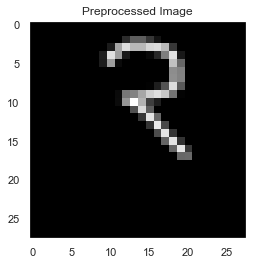

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 0: 0.0000
Digit 1: 0.0005
Digit 2: 0.0000
Digit 3: 0.9986
Digit 4: 0.0003
Digit 5: 0.0004
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0002


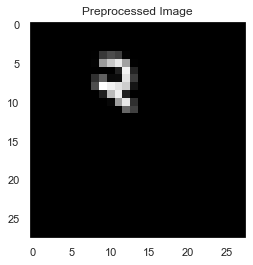

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit 0: 0.0036
Digit 1: 0.1994
Digit 2: 0.0000
Digit 3: 0.0118
Digit 4: 0.0977
Digit 5: 0.4290
Digit 6: 0.0000
Digit 7: 0.0010
Digit 8: 0.0013
Digit 9: 0.2563


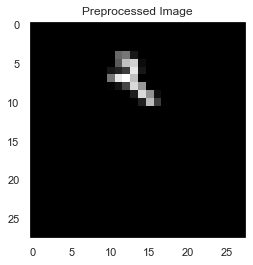

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 0: 0.0024
Digit 1: 0.4164
Digit 2: 0.0000
Digit 3: 0.1356
Digit 4: 0.0969
Digit 5: 0.0436
Digit 6: 0.0000
Digit 7: 0.0001
Digit 8: 0.0007
Digit 9: 0.3043


In [ ]:
class DigitRecognizerApp:
    def __init__(self, model):
        self.model = model

        self.window = tk.Tk()
        self.window.title("Digit Recognizer")

        self.canvas = tk.Canvas(self.window, width=200, height=200, bg='white')
        self.canvas.grid(row=0, column=0, pady=2, sticky=tk.W, columnspan=2)

        self.button_predict = tk.Button(self.window, text="Predict", command=self.predict_digit)
        self.button_predict.grid(row=1, column=0, pady=2, padx=2)

        self.button_clear = tk.Button(self.window, text="Clear", command=self.clear_canvas)
        self.button_clear.grid(row=1, column=1, pady=2, padx=2)

        self.label_result = tk.Label(self.window, text="Draw a digit and click Predict", font=("Helvetica", 16))
        self.label_result.grid(row=2, column=0, columnspan=2)

        self.canvas.bind("<B1-Motion>", self.draw)

        self.image = Image.new("L", (200, 200), 255)
        self.draw_image = ImageDraw.Draw(self.image)

    def draw(self, event):
        x, y = event.x, event.y
        r = 3
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill="black")
        self.draw_image.ellipse([x-r, y-r, x+r, y+r], fill="black")

    def clear_canvas(self):
        self.canvas.delete("all")
        self.draw_image.rectangle((0, 0, 200, 200), fill="white")
        self.label_result.config(text="Draw a digit and click Predict")

    def predict_digit(self):
    # Convert the canvas to an image
        image = self.image.convert('L')  # Convert to grayscale ('L' mode)

    # Resize the image to 28x28 pixels, as the model expects
        image_resized = image.resize((28, 28))

    # Invert the image (MNIST digits are white on black background)
        image_inverted = ImageOps.invert(image_resized)

    # Convert the image to a numpy array and normalize it
        image_array = np.array(image_inverted) # Normalize to [0, 1]

    # Reshape the array to match the input shape expected by the model
        image_array = image_array.reshape(-1, 28, 28, 1)

    # Visualize the preprocessed image before prediction (optional for debugging)
        plt.imshow(image_array.reshape(28, 28), cmap='gray')
        plt.title("Preprocessed Image")
        plt.show()

    # Predict the digit using the trained model
        prediction = self.model.predict(image_array)

    # Print the probabilities for each digit
        for i, prob in enumerate(prediction[0]):
            print(f"Digit {i}: {prob:.4f}")

    # Determine the most likely digit
        digit = np.argmax(prediction)

    # Update the result label with the predicted digit
        self.label_result.config(text=f"Predicted Digit: {digit}")




    def run(self):
        self.window.mainloop()

# Create and run the application
app = DigitRecognizerApp(model)
app.run()
